### Importing Libraries

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import neattext.functions as ntxt
import re
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Scraping

In [92]:
url = 'https://www.amazon.in/New-Apple-iPhone-12-64GB/product-reviews/B08L5TGWD1/ref=cm_cr_arp_d_viewopt_srt?reviewerType=all_reviews&sortBy=recent&pageNumber=1'

In [93]:
page = requests.get(url)
page

<Response [200]>

In [94]:
page.text

'<!doctype html><html lang="en-in" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->\n<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n<!-- sp:end-feature:head-start -->\n\n<!-- sp:feature:cs-optimization -->\n<meta http-equiv=\'x-dns-prefetch-control\' content=\'on\'>\n<link rel="dns-prefetch" href="https://images-eu.ssl-images-amazon.com">\n<link rel="dns-prefetch" href="https://m.media-amazon.com">\n<link rel="dns-prefetch" href="https://completion.amazon.com">\n<!-- sp:end-feature:cs-optimization -->\n\n<!-- sp:feature:aui-assets -->\n<link rel="stylesheet" href="https://images-eu.ssl-images-amazon.com/images/I/11EIQ5IGqaL._RC|01ZTHTZObnL.css,41JZEtDv4tL.css,31Y8m1dzTdL.css,013z33uKh2L.css,017DsKjNQJL.css,0131vqwP5UL.css,41EWOOlBJ9L.css,11TIuySqr6L.css,01ElnPiDxWL.css,11bGSgD5pDL.css,01Dm5eKVxwL.css,01IdKcBuAdL.css,01y-XAlI+2L.css,21N4kUH7pxL.css,01oDR3IULNL.css,41CYNGpGlrL.css,01XPHJk60-L.css,114y0SIP+yL.css,21aPhFy+riL.cs

In [101]:
soup = BeautifulSoup(page.text,'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in">
 <!-- sp:feature:head-start -->
 <head>
  <script>
   var aPageStart = (new Date()).getTime();
  </script>
  <meta charset="utf-8"/>
  <!-- sp:end-feature:head-start -->
  <!-- sp:feature:cs-optimization -->
  <meta content="on" http-equiv="x-dns-prefetch-control"/>
  <link href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
  <link href="https://m.media-amazon.com" rel="dns-prefetch"/>
  <link href="https://completion.amazon.com" rel="dns-prefetch"/>
  <!-- sp:end-feature:cs-optimization -->
  <!-- sp:feature:aui-assets -->
  <link href="https://images-eu.ssl-images-amazon.com/images/I/11EIQ5IGqaL._RC|01ZTHTZObnL.css,41JZEtDv4tL.css,31Y8m1dzTdL.css,013z33uKh2L.css,017DsKjNQJL.css,0131vqwP5UL.css,41EWOOlBJ9L.css,11TIuySqr6L.css,01ElnPiDxWL.css,11bGSgD5pDL.css,01Dm5eKVxwL.css,01IdKcBuAdL.css,01y-XAlI+2L.css,21N4kUH7pxL.css,01oDR3IULNL.css,41CYNGpGlrL.css,01XPHJk60-L.css,114y0SIP+yL.css,21aPhFy+riL

In [102]:
reviews = soup.find_all('div',class_ = 'a-row a-spacing-small review-data')

In [104]:
reviews

[<div class="a-row a-spacing-small review-data"><span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>
   After spending 60k on Amazon Rcvd Defected piece , sealed  was opened &amp; there was lots of scratches on IPhone, not expected this from amazon.
 </span>
 </span></div>,
 <div class="a-row a-spacing-small review-data"><span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>
   Product is very good… liked all the features of iPhone 12. Battery life is not great and sometimes has issues with volume
 </span>
 </span></div>,
 <div class="a-row a-spacing-small review-data"><span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>
   Apple is always great ...it gives whatever it tells
 </span>
 </span></div>,
 <div class="a-row a-spacing-small review-data"><span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>
   Being a chronic (!) iPhone user, no n

### data cleaning and understanding

In [105]:
review_extracted = []
for item in reviews:
    item = item.get_text().replace('\n','')
    item = item.strip(' ')
    review_extracted.append(item)

In [106]:
review_extracted

['After spending 60k on Amazon Rcvd Defected piece , sealed  was opened & there was lots of scratches on IPhone, not expected this from amazon.',
 'Product is very good… liked all the features of iPhone 12. Battery life is not great and sometimes has issues with volume',
 'Apple is always great ...it gives whatever it tells',
 'Being a chronic (!) iPhone user, no need to review the product, though need to appreciate the 4K video in IPhone 12. But about Amazon - have been buying from them for many years now, all and sundry products to many models of iPhones. Never had a problem on the genuineness or the packing! Kudos to the team!',
 'Those who want to exchange there old phone s , for their information they will deny exchange for trivial reasons and ask money in lieu of',
 'The best!',
 'I liked it too much🥰🥰🥰',
 'Iphone is not made for heavy usage so if you keep using it for 4-5 hours then it comes directly 90% to 8% or 7%. Battery is the only cons in iphone also go for iphone 128gb.',

In [107]:
df = pd.DataFrame(data = review_extracted,columns=['review'])
df

,review
0,After spending 60k on Amazon Rcvd Defected pie...
1,Product is very good… liked all the features o...
2,Apple is always great ...it gives whatever it ...
3,"Being a chronic (!) iPhone user, no need to re..."
4,"Those who want to exchange there old phone s ,..."
5,The best!
6,I liked it too much🥰🥰🥰
7,Iphone is not made for heavy usage so if you k...
8,not a good phone to buy. Dont buy it. I have i...
9,Absolutely loved it....everything about it is ...


In [108]:
review = [x.strip() for x in df.review]
review = [x for x in review if x]
review

['After spending 60k on Amazon Rcvd Defected piece , sealed  was opened & there was lots of scratches on IPhone, not expected this from amazon.',
 'Product is very good… liked all the features of iPhone 12. Battery life is not great and sometimes has issues with volume',
 'Apple is always great ...it gives whatever it tells',
 'Being a chronic (!) iPhone user, no need to review the product, though need to appreciate the 4K video in IPhone 12. But about Amazon - have been buying from them for many years now, all and sundry products to many models of iPhones. Never had a problem on the genuineness or the packing! Kudos to the team!',
 'Those who want to exchange there old phone s , for their information they will deny exchange for trivial reasons and ask money in lieu of',
 'The best!',
 'I liked it too much🥰🥰🥰',
 'Iphone is not made for heavy usage so if you keep using it for 4-5 hours then it comes directly 90% to 8% or 7%. Battery is the only cons in iphone also go for iphone 128gb.',

In [109]:
#tagging
nlp = spacy.load('en_core_web_sm')
doc = nlp(review[7])
spacy.displacy.render(doc,style='ent',jupyter=True)

In [110]:
for token in doc[:20]:
    print(token,token.pos_)

Iphone NOUN
is AUX
not PART
made VERB
for ADP
heavy ADJ
usage NOUN
so SCONJ
if SCONJ
you PRON
keep VERB
using VERB
it PRON
for ADP
4 NUM
- SYM
5 NUM
hours NOUN
then ADV
it PRON


In [131]:
noun_verb = [token.text for token in doc if token.pos_ in ('NOUN','VERB')]

In [132]:
#counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(noun_verb)

In [133]:
sum_words = X.sum(axis = 0)

In [134]:
word_freq = [(word,sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]

In [135]:
word_freq = sorted (word_freq, key = lambda x: x[1],reverse=True)

In [136]:
freq_word_df = pd.DataFrame(word_freq,columns=['word','count'])
freq_word_df

,word,count
0,iphone,3
1,made,1
2,usage,1
3,keep,1
4,using,1
5,hours,1
6,comes,1
7,cons,1
8,go,1


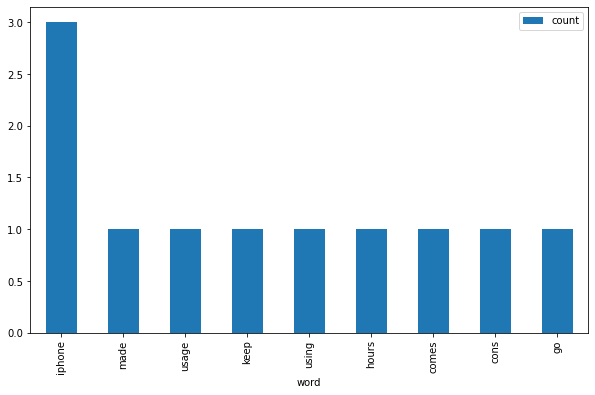

In [137]:
freq_word_df.plot.bar('word',figsize=(10,6))
plt.show()

### Emotion mining

In [118]:
from afinn import Afinn
afinn = Afinn(language='en')

In [119]:
afinn.score('excellent')

3.0

In [120]:
df['sentiment_value'] = df['review'].apply(afinn.score)

In [121]:
df

,review,sentiment_value
0,After spending 60k on Amazon Rcvd Defected pie...,0.0
1,Product is very good… liked all the features o...,8.0
2,Apple is always great ...it gives whatever it ...,3.0
3,"Being a chronic (!) iPhone user, no need to re...",2.0
4,"Those who want to exchange there old phone s ,...",-1.0
5,The best!,3.0
6,I liked it too much🥰🥰🥰,2.0
7,Iphone is not made for heavy usage so if you k...,0.0
8,not a good phone to buy. Dont buy it. I have i...,-1.0
9,Absolutely loved it....everything about it is ...,3.0


In [122]:
df.sentiment_value.describe()

count    10.000000
mean      1.900000
std       2.685351
min      -1.000000
25%       0.000000
50%       2.000000
75%       3.000000
max       8.000000
Name: sentiment_value, dtype: float64

In [123]:
df['word_count']=df['review'].str.split().apply(len)
df['word_count']

0    25
1    22
2     9
3    58
4    26
5     2
6     5
7    37
8    26
9     9
Name: word_count, dtype: int64

In [124]:
df.sort_values(by='sentiment_value')

,review,sentiment_value,word_count
4,"Those who want to exchange there old phone s ,...",-1.0,26
8,not a good phone to buy. Dont buy it. I have i...,-1.0,26
0,After spending 60k on Amazon Rcvd Defected pie...,0.0,25
7,Iphone is not made for heavy usage so if you k...,0.0,37
3,"Being a chronic (!) iPhone user, no need to re...",2.0,58
6,I liked it too much🥰🥰🥰,2.0,5
2,Apple is always great ...it gives whatever it ...,3.0,9
5,The best!,3.0,2
9,Absolutely loved it....everything about it is ...,3.0,9
1,Product is very good… liked all the features o...,8.0,22


In [125]:
df[df.sentiment_value <= 0]

,review,sentiment_value,word_count
0,After spending 60k on Amazon Rcvd Defected pie...,0.0,25
4,"Those who want to exchange there old phone s ,...",-1.0,26
7,Iphone is not made for heavy usage so if you k...,0.0,37
8,not a good phone to buy. Dont buy it. I have i...,-1.0,26


In [126]:
df[df.sentiment_value > 0]

,review,sentiment_value,word_count
1,Product is very good… liked all the features o...,8.0,22
2,Apple is always great ...it gives whatever it ...,3.0,9
3,"Being a chronic (!) iPhone user, no need to re...",2.0,58
5,The best!,3.0,2
6,I liked it too much🥰🥰🥰,2.0,5
9,Absolutely loved it....everything about it is ...,3.0,9


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

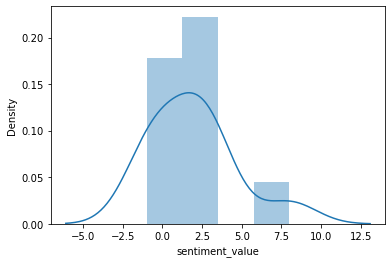

In [127]:
import seaborn as sns
sns.distplot(df['sentiment_value'])

In [128]:
df['index']=range(0,len(df))

<AxesSubplot:ylabel='sentiment_value'>

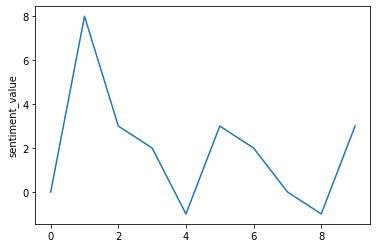

In [129]:
sns.lineplot(y = df.sentiment_value, x = df.index)

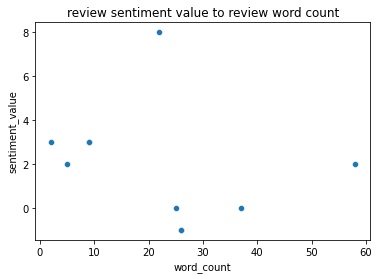

In [130]:
sns.scatterplot(df.word_count, df.sentiment_value)
plt.title('review sentiment value to review word count')
plt.show()